<h1><center> Computational Lexical Semantics</center></h1>
<h5><center>LIN5580-SEM1-A-1718</center></h5>
<h3><center>Angelo Basile and Jovana Urosevic</center></h3>
<h5><center>January 31, 2018</center></h5>

-----
### Instruction on how to use this notebook to replicate the results:

1. download and install python 2
2. download and install [pipenv](https://docs.pipenv.org/)
3. install cython separately: ```pipenv install cython```
4. install the requirements from the Pipfile
5. active the virtualenvironment: ```pipenv shell```
6. ```cd dissect-master```
7. install dissect: ```pipenv run python2 setup.py install```
8. deactive the virtual environment:```exit```
9. run the notebook: ```pipenv run jupyter notebook```
----

TODO put toc

In [1]:
# confirm that dissect is installed correctly:
# this import should give no errors
from composes.semantic_space.space import Space

ImportError: No module named 'composes'

___________

#### 1) Describe the Distributional Hypothesis and explain how it can be used to find semantically similar words in corpora. (3 points)

Distributional hypothesis was introduced by Harris (1968) and refers to the relation between the word meaning and the context it appears in; that is, the distribution of other words that accompany it and/or their syntactic relations (Jurafsky and Martin, 2017). In other words, the idea is that the words with similar meaning are very likely to appear in similar contexts (ibid.). In order to see how this works in practice, we can look at the example below:

(1) *The woolly **lemur**, the aye aye and the ring tail **lemur** can be found on the island of Madagascar.<br>
&ensp;&ensp; **Lemurs** are best known for their large, round reflective eyes and their wailing screams.<br>
&ensp;&ensp; The biggest threat to the **lemur** is deforestation.*

If we did not know what the word ‘lemur’ was, just based on these sentences we could find out that it is an animal that lives on Madagascar, that has big, round eyes and loud screams, that it probably lives in the trees, etc. Besides this, if we take a look at the concordance view in the corpus, not only will we see other contexts that explain the word ‘lemur’, but also other similar words such as *monkey, primate, species*, etc. that frequently appear with it:

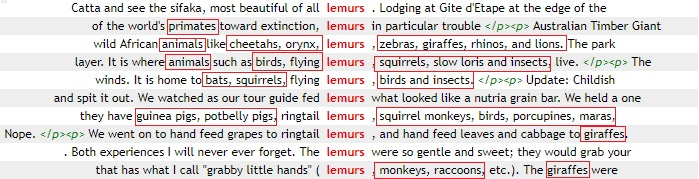
<h6 style="text-align: center;" markdown="1">Figure 1. xxxxxxxxxxxxxx</h6>  

The fact that we can frequently see other words naming types of animals, shows us the similarity these words have with our word ‘lemur’. And if we look gorilla up in the corpus, we will again get quite similar words around it in the context when it is used to refer to an animal (and not as an attribute for a person): monkey, chimpanzee, animal, species, etc. This is what distributional hypothesis is all about:

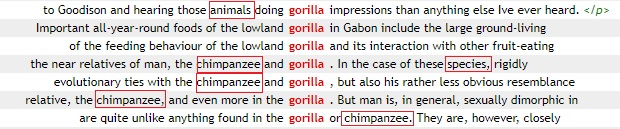
<h6 style="text-align: center;" markdown="1">Figure 2. xxxxxxxxxxxxxxxxx</h6>    

Now, in computational semantics, we can build distributional semantic models to actually calculate similarity between certain words by comparing the contexts they appear in (ibid.). The idea is that the more contexts two words share, the more similar they are. In DSMs contexts are represented as vectors of co-occurrence counts denoting how often do words co-occur with one another (ibid.). Their similarity is then calculated by comparing these vectors - if two words have similar context vectors, then they have similar meaning (Jurafsky and Martin, 2017; Basili and Pennacchiotti, 2010). These are high dimensional, sparse vectors (containing many zeros) because most of the words will just not happen to appear in the context of other words. Ths vector representation of a word meaning is called embedding, while the models trying to use words represented in this way are called vector space models, word space models, vector based models (Evert, et al., 2010; Jurafsky and Martin, 2017).  
&ensp;&ensp; In order to calculate the similarity between terms, we can consider the following example:

|          | get  |  see | use  | hear |
|----------|------|------|------|------|
| lemur    |  5   |  35  |  2   |  22  |
| gorilla  |  9   |  65  |  3   |  36  |
| cat      |  35  |  74  |  5   |  40  |
| chair    |  81  |  35  | 104  |   0  | <br>
<h6 style="text-align: center;" markdown="1">Table 1. xxxxxxxxxxxxxxxxx</h6>    

In the table we see a invented co-occurrence counts for the target words (raws) and their context words (columns). In order to calculate the similarity between for example lemur, gorilla and chair given that they appear with words get and see, we present them in a n-dimensional (Eucledian) space (Evert, et al., 2010):

<img src="pics/example4.jpg" width="600" height="600" />
<h6 style="text-align: center;" markdown="1">Figure 3.xxxxxxxxxxxxxxxxx</h6>    

The position of the words is determined by their co-occurrence counts with the words see and get: lemur = (10, 76). There are several ways of counting similarity now: by either counting the Euclidean distance between the points (spatial proximity) or by measuring the angle between the vectors. Measuring the angle is a better option because takes into account vector’s direction rather than position of the word (Evert, et al., 2010). For example, if we take a look at the distance of the words, cat and gorilla will seem more similar, but if we take a look at the vector’s angle, we will notice that it is very small between the gorilla and lemur showing they very close similarity as compared to cat, or in that matter chair.

#### 2) Because DSMs generate ranked lists of semantically similar words, they can be seen as alternatives to manually built lexical resources such as WordNet. 
**- Explain the main differences between the lexical semantic content of WordNet and the lexical output of DSMs.  **  
In WordNet is organized in a way to present both word senses and their relations with other words senses, such as synonymy, hyponymy, polysemy, metonymy, meronymy / holonymy, antonymy (Miller et al, 1990). It contains open class words (nouns, adjectives, verbs and adverbs) that are grouped into synonym sets (synsets) and organized by semantic relations (Miller et al, 1990). Words are already disambiguated and we can extract easily what kind of relation is there between similar or related words, because that information is explicitly stated throughout its hierarchical structure. On the other hand, when it comes to the output of a DSMs for a specific target word, we get only a sorted list of most semantically related words and their scores, without any information about what kind of relation exists between the target word and the outputed word.   
<br>
**- Discuss advantages and drawbacks of manually built lexical resources such as Wordnet and automatically generated lexical resources such as lists of semantically similar words stemming from DSMs. **  
When it comes to WordNet, one of its advantages is that it is hand-built by linguist and therefore is very precise (Van der Plas, 2017). However, this kind of resource is expensive and time-consuming to create and can also be quite difficult to maintain and keep updating for new words. These are some of the reasons it is difficult to have a similar resource for other languages. Furthermore, it is definitely an advantage to have explicit relations marked between different senses of words together with glosses explaining the sense. One of the improvements here would be to provide currently missing frequency information alongside the synsets; if we take a look at WordNet, will see that a lot of senses after the first ones are quite infrequent in English language (ibid.), however no explicit knowledge is given about this. Also, when it comes to relations between synsets, most of them are represented as binary, which is not the case for synonyms for example; there is a higher or lower level of similarity / relatedness that is not quantified in WordNet. Here words are either synonyms or not (ibid.). This however can be overcome using a thesaurus-based algorithms to calculate words similarity given the hierarchical structure of WordNet (Jurafsky and Martin, 2017). In this case, similarity is calculated based on the distance of two words in the hierarchy.  
&ensp;&ensp; On the other hand, DSMs have their pros and cons as well. These models are fast to obtain and inexpensive as opposed to WordNet creation, and therefore can be applied to any domain and any language. Also, they provides a way to quantify semantic relatedness between words (ibid.). However, the significant disadvantage DSMs have compared to WordNet is that besides the similarity scores we get in the output, we have no further information about the relations between observed words. Not only that we get synonyms in the outputs, but all other sorts of semantic relations such as antonymy, hyponymy, etc. (Sahlgren, 2001). Similarity is taken quite broad in this approach and has as its disadvantage not being able to distinguish between synonyms, antonyms, etc. (ibid.).
 
<br>
**- Can you think of an application that would fare better when using WordNet and another thatwould benefit more from the output of DSMs? (5 points)**  

DSMs, Presentation, USE: These can be used for applications such as I Information retrieval I Document clustering
WordNet USES: Synonymy is a binary relation : Words are synonyms or not. I For many applications we want a looser metric : semantically related words I This includes all the lexical relations mentioned above, including indirect relations, plus associations such as : beach-sun I Possible applications : I Information retrieval I Document clustering

#### In this assignment, in order to gather semantically similar words, we will use the following:
**1. Data:**
- A monolingual corpus. (English)
- Word-aligned parallel texts for a language pair English-Spanish

**2. Tools:**
- an extraction program (for the extraction from the parallel text): a program that gathers coocurrence counts for the target words
- a DSM tool, a program that will compute the similarity between the coocurrence vectors for the head words we are interested in – taking the coocurrence matrix as input

#### Building a coocurrence matrix from a corpus:
There are several ways to build a coocurrence matrix depending on the target words you are selecting (parameter 1) and the type of features, more in particular, the type of context you are selecting (parameter 2). Please refer back to the slides of the lecture on DSMs for a list of parameters and a description of the options.

#### *TARGET WORDS*:

#### 3) Does the monolingual corpus you are using to extract the cooccurrence counts from provide lemmas? Discuss why using lemmas instead of words often leads to better performances in DSMs. (3 points)
The monolingual corpus **does / does not** provide lemmas.
Lemmatization is a type of text normalization that we apply in order to reduce dimensionality and avoid data sparseness (Turney and Pantel, 2010). Here we are interested in word similarity, and  therefore, we will want to convert all the different grammatical forms of certain word into one, lemma, since they all carry the same meaning. In this way, we will avoid counting separately in the co-occurrence matrix different forms of the same word. It leads to better performance because in this way we are eliminate redundant grammatical information and have it easier to recognize similarities among words (ibid.).
Besides, it can also help us disambiguate between different parts of speech. For example, in Spanish trabajo can be the noun “work” or a verb “work” as in “I/you/we/you/they work”. If we lemmatize trabajo as a verb, the ambiguity disappears: trabajar.

Generalisation of terms
I often lemmatised to reduce data sparseness:
go, goes, went, gone, going ➜ go
I POS disambiguation (light/N vs. light/A vs. light/V)

#### 4) Extra points: The parallel text does not provide lemma information, nor PoS tags. Run a PoS tagger on (both sides of) the parallel text and use the information it gives you for the DSM. (+5 points)

The data provided with DISSECT already selected target words for you. For the parallel text, and in case you selected your own monolingual text, we take the 1550 most frequent content words (lemmas) in the corpus as target words. In order to determine the 1550 most frequent content words in either corpus, you will need to count all content words. (If you do not have access to PoS information, use a list of stopwords that you filter out.) You then need to rank these words according to their frequency and take the top 1550.

#### 5) Explain why PoS information can be useful for distinguishing between ambiguous terms. Give some examples from the data you are using. (3 points)
It happens that we have the same word of a different POS in different contexts.

Paper Vectors:
it also happens that identical strings of characters may have different
meanings, depending on the context. Common forms of annotation include part-of-speech
tagging (marking words according to their parts of speech),

Work if not specified part of speech, in spanish can be trabajar, trabajo, trabajas, trabajamos, trabajáis, trabajan, and if there are no lemmas provided either
If there are lemmas then we have work: trabajo, trabajar  
We need to specify art of speech to disambiguate the English word. This is just one case, but there are plenty of others: run, walk, etc. But the more complicated case is well for example, that can be either interjection, adjective, adverb, noun, verb:
[...] this work has been carried out extremely well. (adv) : Creo que es un trabajo muy bien realizado .
Well , we in Britain are looking to the European Court at the moment. (interj) :
En fin , en Gran Bretaña hemos recurrido [...], Bien es verdad que se redactan regulaciones [...] (it could be also translated as vaya, hala, but in more informal contexts)
[..] is like carrying water to fill up a dry well (noun) : [...] es como si llevásemos agua al pozo
(others in general Strong emotions welled up inside me. (verb) : brotar, He's not a well man. (adj) : bueno)
Opposite direction:
el rojo es un buen color

tienen dificultades con esta cuestión a dar esos pocos pasos más  Determinante
who have difficulties in this matter to take those few extra steps . adj
Adverbio: Esto me molestó un poco porque 
Eng: I was somewhat irritated about this (informal: a bit, a little)

#### *FEATURES*:

#### 6) Please discuss in your report, the different types of features, more in particular, the types of context (parameter 2) that are employed for DSMs in general. (5 points)
As previously shown, DSMs are based on a co-occurrence matrix. There are several types of co-occurrence matrices that we could build, such as term-document matrix, term-context matrix and pair-pattern matrix (Turney and Pantel, 2010; Jurafsky and Martin, 2017).  
**1. Term-document matrix.** In this kind of matrix rows represent terms (words of the vocabulary), while columns represent documents (they can be actual documents of some kind or just a bigger collection of text like web pages) (Jurafsky and Martin, 2017). Each cell of the matrix contains the number of times each word appears in each document. In this way, each document is represented as a count vector represented as a point in a n-dimensional space. Two documents are similar if they contain similar words, and therefore have similar vectors (ibid.). And as seen earlier, we can measure the similarity between documents either by measuring the distance between points or by measuring the angle between the vectors. The smaller the angle/ distance, the more similar two documents are. In other words, more similar words they contain, the more similar they are. 

|          |  doc1  |  doc2  |  doc3  |     
|----------|--------|--------|--------|    
| lemur    |   0    |   15   |    1   |
| gorilla  |   0    |   21   |    2   |
| cat      |   6    |    4   |   17   |
| chair    |   12   |    0   |    0   |

<h6 style="text-align: center;" markdown="1">Table 2. Term-document matrix.</h6>    
<br>
**2. Term-context matrix** (also called word-word or term-term matrix). When it comes to term-context matrix, the rows of a matrix are again target words (terms), while in the columns we have a narrower context than previously used document, but ‘context’ can refer to anything from a whole vocabulary, certain words, paragraphs, sentences, to specific syntactic relations among words. The following summarizes context possibilities (Evert et al., 2010; Van der Plas, 2017):  
** - Surface context: **  
This refers to the “window” around the target word, which basically consists of n words or characters to its left and n words or characters to its right (ibid.). In this case the cells in the matrix would contain counts of how many times the word in the column appeared in the n- word window around the row (target) word. For example, if we have the 7-word window around the words *gorilla, lemur, cat and chair*, we get the following example sentences:  

*(2)  
&ensp;&ensp;&ensp;&ensp; with the consequent loss of habitat for &ensp;&ensp;&ensp;&ensp;&ensp; **gorillas** &ensp;&ensp;, elephants and other threatened animal  
&ensp;&ensp;&ensp;&ensp; that there is a home for owls and squirrels, &ensp;&ensp; **lemurs** &ensp;&ensp;, parrots and toucans. A river with slightly  
&ensp;&ensp;&ensp;&ensp; outback have been set back by domestic &ensp;&ensp;&ensp; **cats** &ensp;&ensp;&ensp; , which have killed 11 of the rare animals  
&ensp;&ensp;&ensp;&ensp; Kendal would you like to bring your &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; **chair** &ensp;&ensp;&ensp; over. Rachael can you see the board from where*  

And then make a matrix the four target words in columns and example column words from the context of 7-word window (there are many more words that could be added to the matrix, but this is just and example):

|           | ... |  habitat  |  elephants | animal | squirrels| board | ... |
|-----------|-----|-----------|------------|--------|----------|-------|-----|
| lemurs    | ... |     0     |      0     |   0    |     1    |   0   | ... |
| gorillas  | ... |     1     |      1     |   1    |     0    |   0   | ... |
| cats      | ... |     0     |      0     |   1    |     0    |   0   | ... |
| chair     | ... |     0     |      0     |   0    |     0    |   1   | ... |

<h6 style="text-align: center;" markdown="1">Table 3. Term-context matrix.</h6>    
The size of the window can be as small or as big as we need. Depending on what kind of relations we want to extract, we will need one or the other. More about how the window size can influence the relations we can extract from corpus is in the question 7. Furthermore, we can choose if we want to get both the left and the right context, or only one of them, depending if we are interested in the words that follow or recede the target word. For example, if we wanted to see what kind of adjectives normally describe a lemma *woman*, then we would chose to see only the left context. And finally, we can chose to weight words that are closer or further from thee target word in context, again depending on what kind of information we want to extract; we can have either uniform or distance-based weightening (Evert et al., 2010).  
** - Textual context:**   
This type of context refers to the fact that the context terms belong to the same linguistic unit as the target term (Evert et al., 2010). Commonly these linguistic units are sentences, paragraphs, but can also be turns in a conversation or texts on web pages (Evert et al., 2010; Van der Plas, 2017). This type of context resolves somewhat the problem surface context has - we need to choose an particular number that will not always fulfill our expectations: it can be too big and go over sentence or paragraph boundaries, or too small and not catch the context we want (for example, catching a context of *throw* in a 3-word window will catch *throw a birthday party*, but not *throw a big birthday party*) (Evert, 2008). This can be especially problematic when working with a language that has a more free word order and where closely related words would happen to appear far apart in the context. In those cases, this kind of context would be more appropriate to use.  
**- Syntactic context:**  
This type of context includes co-occurrence counts of target words and the words that have a specific syntactic relation with the target words (Evert et al., 2010; Van der Plas, 2017). We can have different types of relations, such as subject, object, modifier, coordination, apposition, etc. (ibid.).  

|          |  eat-subj |  paint-obj |  long-tailed-adj | have-obj |   
|----------|-----------|------------|------------------|----------|  
| lemur    |     32    |      0     |         43       |    16    |
| gorilla  |     35    |      0     |          9       |    17    |
| cat      |     30    |      0     |          5       |    25    |
| chair    |      0    |     20     |          0       |    24    |

<h6 style="text-align: center;" markdown="1">Table 4. Term-context matrix: syntactic context.</h6>    
In this way, the columns of the matrix are syntactic relations with specific words  we are interested in, while the cells contain how many times the target and the context word appeared in the particular syntactic context. As compared to the surface context, it does not set a strict word limit for a context but it manages to catch relations happening further away from the target word in the context; while compared to the textual, it introduces less noise (Evert, 2008).  
**- Multilingual or translational context**  
When it comes to multilingual context, it contains as columns target word translated to other languages, while cells contain how many times a certain target word was translated in a particular way in a particular language (Van der Plas, 2017). This kind of information we can extract from aligned parallel corpora. For example:  

|          |  autunno-IT |  herfst-NL | 
|----------|-------------|------------|
| fall     |       8     |     13     |
| autumn   |      10     |      8     |  

<h6 style="text-align: center;" markdown="1">Table 5. Term-context matrix: translational context.</h6>    
Here we can see how many times the formal variations with the same meaning *autumn* and *fall* were translated as such in Italian and Dutch. Besides looking at different types of translations, in this context we can also capture how a certain phrase or a word is expressed in different languages.


**3. Pair-pattern matrix.** The pair-pattern matrix is used to measure similarity between different kind of patterns (Turney and Pantel, 2010). In this matrix the columns represent the patterns, for example *X solves Y*, while the cells contain the counts of how many times target words appear as a part of this pattern. As stated by Lin and Pantel (2001) (in Turney and Pantel, 2010), pairs of target words that co-occur with similar patterns, tend to have similar meaning. The idea is that given the pattern X solves Y, we will find similar patterns such as “Y is solved by X”, “Y is resolved in X”, and “X resolves Y ” (Turney and Pantel, 2010). That is, these patterns tend to appear together with similar X and Y word pairs, which points to their similar meaning. For example, pairs *mason : stone, carpenter :wood* appear with similar semantic relation *artisan :material*  (Turney and Pantel, 2010).  
<br>
In summary,  the more structured and restricted the context, the more closely related are the words the system finds. Synonymy is a very tight semantic relation, co-hyponymy and direct hyponymy a bit less, indirect hyponymy even less. Mere association is the least semantically tight relation. (Van der Plas, 2017)
_______________________________

**For the aligned parallel text, we are going to select the words that are aligned to the target word as features. Please select only the 10000 most frequent content words as features. If you opted to include your own monolingual corpus, we are going to select a small window of the content word following and the content word preceding the target word, as features. Please select only the 10000 most frequent content words as features.**

#### 7) Discuss what influence the size of the window has on the nature of the semantic relations we find between target word and semantically similar words proposed by the system. What consequences do you think a larger window size would have on the semantically similar words proposed by the system? (3 points)
Example from Evert et al. (2010), nearest neighbours for a word *dog* extracted from BNC with different window sizes:  
*(3)*  
&ensp;&ensp;&ensp; 2-word window: *cat,  horse, fox, pet, rabbit, pig, animal, mongrel, sheep, pigeon*  
&ensp;&ensp;&ensp; 30-word window: *kennel, puppy, pet, bitch, terrier, rottweiler, canine, cat, to bark, Alsatian*  
<br>
In general, the shorter the window, the more syntactic information we catch since we are focusing only on the nearest neighbours of the target word, while on the other hand, longer window catches more semantic relations between the words (Jurafsky and Martin, 2017). In this sense, we have two kinds of similarity as stated by Jurafsky and Martin (2017). Firstly, we say that words have first-order co-occurrence (syntagmatic association) when they are normally found near each other. For example, that is the case with words *book* and *poem* with the verb *write*; they indeed normally appear close to one another and *book* and *poem* are normally encountered as objects of the verb *write*. On the other hand, we have a second-order co-occurrence (paradigmatic association) if the words have similar neighbours (Jurafsky and Martin, 2017). For example, this is the case with the word *wrote* and words *said*, *told*, etc.  
&ensp;&ensp; When it comes to the type of a semantic relation depending on the window size, when we have a shorter window, we catch similar words to the target in the sense that it can appear in the similar syntactic position. In the example given below, we get all sort of names for animals when we look for the similar words for *dog*: *cat, horse, pidgeon*, etc. With the wider window, we catch words like *dog* that are likely to appear in a similar text, in the text of a similar topic: *kennel, puppy, pet, bitch*. In the wider context, we get synonyms for example, while in the narrower context we get related words, hyponyms, hypernyms, ..  
&ensp;&ensp; The more restricted the context, the more closely related are the words the system finds. 
The larger window allows us to capture a bit further semantic relations. 
the wider the context the bigger chance is for us to find synonyms since they will not normally occur one after another  

Presentation:
The more structured and restricted the context, the more closely related are the words the system finds. Synonymy is a very tight semantic relation, co-hyponymy and direct hyponymy a bit less, indirect hyponymy even less. Mere association is the least semantically tight relation.:

#### 8) Discuss the differences in output of the DSM (in terms of the similar words it will produce) you expect between the two types of input you are using (the monolingual corpus and the aligned parallel files). Which type of data do you think will generate the highest percentage of synonyms amongst the nearest neighbours? (3 points)

#### 9) Write a python program that extracts coocurrence counts for all target words and features from the parallel aligned files (and the monolingual corpus, if you are using a different corpus than the one provided by DISSECT).  Include the extraction program you wrote in the submission, and paste 20 lines (for 20 target words) of the coocurrence counts you extracted in the report. The output of your program should be formatted according to the input format the DSM tool you are using requires. (36 points)

#### *Feature weighting and similarity function:*

#### 10) Explain what function the feature weighting scheme has. What would be the drawback of doing without a weighting scheme and using raw frequencies instead? (3 points)
When working with language and having a big collection of words as features, we commonly end up with having a very noisy feature representation, which means that we have a lot of features that are redundant and not very informative for the task we are trying to conduct. The purpose of using a measure of feature weighting is to reassign new counts to the co-occurrence matrix, but this time taking into account how informative they are for our task. For example, if we just take raw counts into consideration, it will turn out that frequent words, such as *the, a it, about, on, for*, etc. (stop words), appear very frequently in a lot of contexts and therefore mislead us into thinking that they are similar with a lot of different kind of words just because they appear very frequently. So the raw counts are not the best measure of similarity between words (Jurafsky and Martin, 2017; Van der Plas, 2017) and can many times mislead us. Also, for example, if we are trying to figure out what kind of context is shared between *gorilla* and *lemur* but not by *chair* and *table* we will not get a lot of information from the stop words mentioned earlier, that will appear in a lot of contexts and with many different words and therefore cannot tell us anything in particular about any target word. Since this is the case and we would like to extract the most informative context words, we need to measure the informativeness of words we want to use.  
&ensp;&ensp; There are several weightnening measures we can use, for example Pointwise mutual information or log-likelihood ratio. These are association measures of “how much more often  than chance two words co-occur” (Jurafsky and Martin, 2017), that is it weights the association between the target word and the features by comparing the expected and the observed co-occurrence frequency (Van der Plas, 2017). “The less frequent the target word and the context feature are, the higher the weight given to their observed co-occurrence count should be (because their expected chance co-occurrence frequency is low)” (Evert et al., 2010).  
&ensp;&ensp; Another very known feature weighting method is tf-idf. It is not much used when measuring semantic similarity, but it is used in many other applications, especially information retrieval where it is a dominant method for weighting frequencies. (Jurafsky and Martin, 2010). What it does is that it give less weight to the features that appear in a lot of different documents, because that means they are not very informative for distinguishing between different types of documents. Fro the words that appear not as often and in only certain type of document, more weight is given since it shows that they are a good indicator of that document type (ibid.). So more weight is given to a term frequent in a certain document type, but rare in general in other documents.

#### 11) List the weighting schemes the tool you are using includes and what similarity functions. Make your choice for the weighting scheme and similarity function you will use and motivate your choice in the report. (3 points)

#### *Analysing the output:*

**Now we are ready to generate some output. You should be able to get the distributional similar words of any of the 1550 target words you selected.**

#### 12) For both types of corpora (multilingual and monolingual), retrieve the top-5 semantically similar words for five high-frequency words and five low-frequency words from the 1550 words. Paste the output in the report. 
- Is there a difference in the quality of the output for the high-frequency versus the low-frequency words?
- Is there a difference for the two types of contexts used? Can you explain what you see? (5 points)

#### 13) Explain the notion of contextual variability.
Take a polysemous word of your choice that is among the 1550 head words you selected. Generate the top-10 semantically similar words for this target word using the monolingual DSM you created. Paste the output in the report.  
**- Do you see some consequences of contextual variability in the outputs for this word?**  
Now take the multilingual DSM. Find a polysemous word in the features of the multilingual DSM1. For its translation in your target language, find the top-10.  
**- What are your observations?**  
**- Do you think using multiple languages could have improved the multilingual DSM? (5 points)**

#### *Compositionality:*

#### 15) Now, let us experiment with compositionality in the monolingual DSM you have just built. Follow the instructions on http://clic.cimec.unitn.it/composes/toolkit/composing.html and select a model of your choice (motivate your choice). Show some example output of the composed DSM. Analyse the results. (5 points)

#### 14) Explain the principle of compositionality and discuss a couple of different ways in which DSMs have been adapted to cater for compositionality. (3 points)
Most of the work done in Distributional semantics takes into account only single, isolated words (Guevara, 2011). However, in language we combine words into bigger structures, phrases and sentences, such as *strong coffee, table cloth, hot dog*, etc. (Van der Plas, 2017). Therefore, we would want DSMs to be able to deal with these more complex structures as well. This is where the compositionality theory comes in place, which is the fundamental idea in most of the contemporary works in semantics (Van der Plas, 2017). It is based on the Principle of compositionality: the meaning of a complex expression is comprised of the meaning of its parts and by the syntactic rules that combine them (Partee, ter Meulen and Wall, 1990: 318 in Guevara, 2011).  
&ensp;&ensp; So the question rises how to deal with compositionality in DSMs. This is not an easy task and if we take a look at the compounds as a quite good example of how problematic compositionality is, we will see that there are several levels of compositionality (Van der Plas, 2017). Some compounds can have somewhat  compositional meaning, as in *table cloth*, others can have it partially compositional as *data base*, while some will have a meaning that cannot be split into meaningful parts as in *hot dog*. Besides, they could consist of combinations of different parts of speech ADJ-N, N-N, V-N, etc. (ibid.).  
? Verbs + Prepositions: I e.g. the difference between to stand on and to stand up I Phrasal compositionality: I e.g. red car  
&ensp;&ensp; Previous research has had several ideas to tackle the problem of compositionality using DSMs models. Firstly, the attempt was made to treat complex expressions as a whole unit, since some of them already are merged together as for example database or compounds in general in German language. Following the Distributional hypothesis, we could then represent the meaning of a compound by looking at all the contexts it appears in. However, the problem with this approach is that it works only when looking into a really large corpus of text and with only very frequent compounds, so data sparsity would be an issue since the rare compounds would be quite bad representations (Van der Plas, 2017). Besides, even with the frequent compounds there an issue of be able to “generalize or reuse word meaning in a transparent use” (ibid.).  
&ensp;&ensp; Given all the issues previously stated, the work done after this treat compositionality as a function, which means that given to independent vectors, the semantically compositional resulting vector is created by one of the following operations: vector addition, (pointwise) vector multiplication or tensor product (Guevara, 2011; Van der Plas, 2017).  Vector addition is one of the most common approaches in the literature introduced by Mitchell and Lapata (2010) (as stated in Van der Plas, 2017)) and it involves a simple addition as follows:  

(3)  summation: v1 + v2 = v3  
      		   red \[1 2 0\] +  house  \[14 16 20\] =  red house \[15 18 20\]   
     multiplication: v1 x v2 = v3 
     		      red \[1 2 0\] x  house  \[14 16 20\] = red house \[14 32 20\]  
     tensor product: v1⊗v2 = v3  
		      red = \[1 2 0\] ⊗ house = \[0 1 3\] = red house  \[1*0, 1*1, 1*3, 2*0, 2*1, 2*3, 0*0, 0*1, 0*3\]
              =  red house \[0, 1, 3, 0, 2, 6, 0, 0, 0\]   
<br>
So given two vectors v1 and v2, we get a compositional meaning of v3 by summing the previous two up. Summing vectors is computationally efficient, however it does not provide us with an ideal solution (Van der Plas, 2017): the new vector is in between the two, but is more governed by the one that contains higher individual frequency counts. In the example of the *red house*, the new vector is more influenced by the vector *house* than the vector *red*. Therefore, it resembles more a union than an intersection (ibid.).  
&ensp;&ensp; Mitchell and Lapata (2010) introduced also pointwise-multiplication of vectors. It differs from the addition model by only taking into account non-zero components of the vectors while the summation considers all of the components. The intuition is similar, we multiply two vectors and get as an output a third one that should correspond to the complex expression.  
&ensp;&ensp; Widdows (2008) (in Guevara, 2011) introduces a more complex vector operation, tensor product in order to capture meaning compositionality. The result of a tensor product of two vectors is a high dimensional matrix, which was shown empirically to catch better the compositionality of meaning (Van der Plas, 2017).  
&ensp;&ensp; All of the previously mentioned approaches have one thing in common: they all apply one single geometric operation on the vectors v1 and v2; it seems unlikely that only one operation can work on all semantic and syntactic relations and in all languages (Guevara, 2011).  


#### 16) Is it possible to create a compositional model for the multilingual DSM with the models you have chosen? If so, show some example output here as well. Analyse the results. (5 points)

#### *Relating things back to theory:*

**We discussed several theories in class that try to explain the lexical semantics of words. We are now trying to couple our knowledge from one of these theories to the things we observe in the DSM. 1 For example, if English is your target language and you chose German as the counterpart in the parallel text, you could choose Kiefer in German (see slides). One of its translations in English is pine. Now, get the top-10 most similar words of pine in the multilingual DSM and describe if you see any unexpected nearest neighbours. You can try with several polysemous words, if you like.**

#### 17) Discuss the basic tenet of the Prototype Theory in lexical semantics and discuss at least two advantages when compared to the classical theory. (5 points)



#### 18) What are typicality effects? Does the DSM cater for typicality effects?
(Hint: You can check the distributional similarity of types of fruit and see if the prototypical examples are more semantically similar to each other than less prototypical examples. You can also check whether prototypical types of fruit have more statistically prominent properties in the coocurrence matrix than less prototypical types of fruit.) (5 points)



### Team work distribution by assignment questions:

- **Angelo**:  
1, 4, 5, 7, 11, 13, 14

- **Jovana**:  
2, 3, 6, 8, 10, 12, 17 

- **Together:**  
9, 18, compositionality / embeddings

### References

Basili, Roberto and Marco Pennacchiotti. (2010). Distributional lexical semantics: Toward uniform representation paradigms for advanced acquisition and processing tasks. In: Natural Language Engineering, 16 (4), pp. 347–358, 2010.

Evert, Stefan (2008). Corpora and collocations. *In A. Lüdeling and M. Kytö (eds.), Corpus Linguistics. An International Handbook*, chapter 58. Mouton de Gruyter, Berlin.

Evert, Stefan, Marco Baroni, and Alessandro Lenci. (2010). *Distributional Semantic Models*, Tutorial at NAACL-HLT 2010, Los Angeles, CA.

Guevara, Emiliano. (2011). Computing semantic compositionality in distributional semantics. *In Proceedings of the Ninth International Conference on Computational Semantics (IWCS '11)*. Association for Computational Linguistics, Stroudsburg, PA, USA, pp. 135-144.

Harris, Zellig S. (1968). *Mathematical structures of language*. New York: Interscience Publishers.

Jurafsky, Daniel and James H. Martin. (2017). Speech and Language Processing. Draft from August 2017, available [here](https://web.stanford.edu/~jurafsky/slp3/15.pdf).

Miller, George A., Richard Beckwith, Christiane Fellbaum, Derek Gross, and Katherine Miller. (1990). Introduction to WordNet: an on-line lexical database. *International Journal of Lexicography* 3, (4), pp. 235-244, 1990.

Sahlgren, Magnus. (2001). The distributional hypothesis. *Italian Journal of Linguistics* 20, pp. 33-53, 2001.

Turney, Peter D. and Patrick Pantel. (2010). From frequency to meaning: vector space models of semantics. *Journal of Artificial Intelligence Research* 37, (1), pp.141-188, 2010.

Van der Plas, Lonneke. (2017). *LIN2580/LIN5580: Computational Lexical Semantics, week 6 notes* \[PowerPoint slides\]. Retrieved from [here](https://www.um.edu.mt/vle/pluginfile.php/272004/mod_resource/content/5/CompLexSemLect6.pdf).